## Лучшая специальность
___

### Первичный анализ

В данном проект мы будем работать с набором данных, содержащим списки выпускников колледжа с 2010 по 2012 по разным специльностям. Эти данные были собраны [ American Community Survey](https://www.census.gov/programs-surveys/acs/), а затем почищены пользователем github. Скачать их можно [здесь](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Каждая строчка в файле соответствует одной специальности, ниже приведе расшифровка столбцов:

* Rank - рейтинг по среднему доходу
* Major_code - код специальности
* Major - описание специальности
* Major_category - категория специальности(факультет)
* Total - кол-во человек с данной специальностью
* Sample_size - размер выборки
* Men - кол-во выпусников-мужчин
* Women - кол-во выпусников-женщин
* ShareWomen - процент женщин от общего числа
* Employed - кол-во трудоустроенных
* Median - средняя зп трудостроенных на более 35 часов весь год 
* Low_wage_jobs - кол-во малооплачиваемых работ из сферы обслуживания
* Full_time - кол-во трудоустроенных на более 35 часов в неделю
* Part_time - кол-во трудоустроенных на менее 35 часов в неделю

Ниже мы посмотрим какие специальности наиболее прибыльны, распеределение выпускников по полу, а также в какой категории счпециальности больше всего студентов.

Для начала подгрузим необходимые библиотеки и проведём первичный анализ данных

In [1]:
import pandas as pd
import matplotlib as plt

%matplotlib inline

recent_grads = pd.read_csv('recent-grads.csv')

recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [2]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [3]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [4]:
recent_grads.describe(include='all')

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,173,172.000000,172.000000,172.000000,173,172.000000,173.000000,173.000000,...,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
unique,NaN,NaN,173,NaN,NaN,NaN,16,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,MOLECULAR BIOLOGY,NaN,NaN,NaN,Engineering,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,NaN,NaN,NaN,29,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,87.000000,3879.815029,NaN,39370.081395,16723.406977,22646.674419,NaN,0.522223,356.080925,31192.763006,...,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,NaN,63483.491009,28122.433474,41057.330740,NaN,0.231205,618.361022,50675.002241,...,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,NaN,124.000000,119.000000,0.000000,NaN,0.000000,2.000000,0.000000,...,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,NaN,4549.750000,2177.500000,1778.250000,NaN,0.336026,39.000000,3608.000000,...,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,NaN,15104.000000,5434.000000,8386.500000,NaN,0.534024,130.000000,11797.000000,...,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,NaN,38909.750000,14631.000000,22553.750000,NaN,0.703299,338.000000,31433.000000,...,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000


Удалим строки с пропущенными значениями и приведём названия столбцов в нижний регистр.

In [5]:
recent_grads = recent_grads.dropna(axis=0)
recent_grads.rename(str.lower, axis=1, inplace=True)

recent_grads.describe(include='all')

,rank,major_code,major,total,men,women,major_category,sharewomen,sample_size,employed,...,part_time,full_time_year_round,unemployed,unemployment_rate,median,p25th,p75th,college_jobs,non_college_jobs,low_wage_jobs
count,172.000000,172.000000,172,172.000000,172.000000,172.000000,172,172.000000,172.000000,172.00000,...,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
unique,NaN,NaN,172,NaN,NaN,NaN,16,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,COMPUTER AND INFORMATION SYSTEMS,NaN,NaN,NaN,Engineering,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,NaN,NaN,NaN,29,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,87.377907,3895.953488,NaN,39370.081395,16723.406977,22646.674419,NaN,0.522223,357.941860,31355.80814,...,8877.232558,19798.843023,2428.412791,0.068024,40076.744186,29486.918605,51386.627907,12387.401163,13354.325581,3878.633721
std,49.983181,1679.240095,NaN,63483.491009,28122.433474,41057.330740,NaN,0.231205,619.680419,50777.42865,...,14679.038729,33229.227514,4121.730452,0.030340,11461.388773,9190.769927,14882.278650,21344.967522,23841.326605,6960.467621
min,1.000000,1100.000000,NaN,124.000000,119.000000,0.000000,NaN,0.000000,2.000000,0.00000,...,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.750000,2403.750000,NaN,4549.750000,2177.500000,1778.250000,NaN,0.336026,42.000000,3734.75000,...,1013.750000,2474.750000,299.500000,0.050261,33000.000000,24000.000000,41750.000000,1744.750000,1594.000000,336.750000
50%,87.500000,3608.500000,NaN,15104.000000,5434.000000,8386.500000,NaN,0.534024,131.000000,12031.50000,...,3332.500000,7436.500000,905.000000,0.067544,36000.000000,27000.000000,47000.000000,4467.500000,4603.500000,1238.500000
75%,130.250000,5503.250000,NaN,38909.750000,14631.000000,22553.750000,NaN,0.703299,339.000000,31701.25000,...,9981.000000,17674.750000,2397.000000,0.087247,45000.000000,33250.000000,58500.000000,14595.750000,11791.750000,3496.000000


### Подключаем графики

Давайте ниже попробуем ответить на следующие вопросы:

* Зарабатывают ли больше денег студенты с популярных специальностей?
* Зарабатывают ли больше денег студенты со специальностей, большинство на которых женщины?
* Есть ли связь между количеством трудоустроенных на постоянную работу студентов и средней зп?

Для этого построим точечные диаграммы для следующих пар величин:

* sample_size и median
* sample_size и unemployment_rate
* full_time и median
* sharewomen и unemployment_rate
* men и median
* women и median

Проанализируем их и попробуем установить какие-то корреляции.

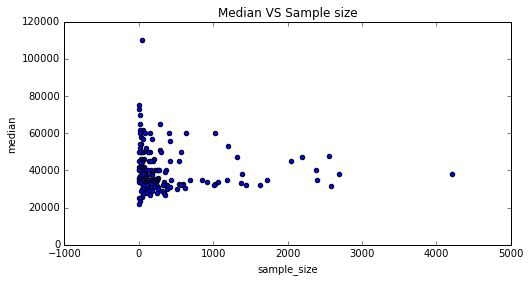

In [6]:
sample_median_ax = recent_grads.plot(x='sample_size', y='median', kind='scatter', figsize=(8, 4),
                                     title='Median VS Sample size')

> Более популярная специальность не приносит больше всего денег. Однако она может обеспечить среднюю зп не менее 30к в год, что выше показателей некоторых менее популярных специальностей 

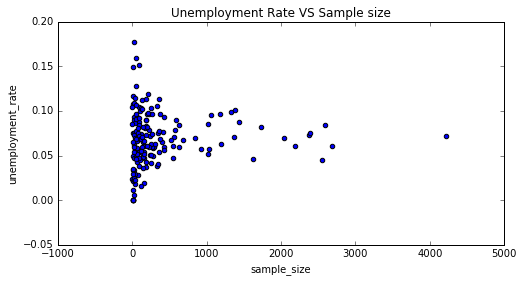

In [7]:
sample_unempl_ax = recent_grads.plot(x='sample_size', y='unemployment_rate', kind='scatter', figsize=(8, 4),
                                     title='Unemployment Rate VS Sample size')

> Рейтинг безработицы среди выпускников популярных специальностей находится на среднем уровне - от 0,05 до 0,10. Как и большинства менее популярных специальностей

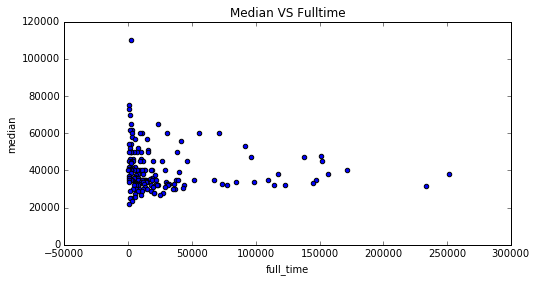

In [8]:
sample_fulltime_ax = recent_grads.plot(x='full_time', y='median', kind='scatter', figsize=(8, 4),
                                     title='Median VS Fulltime')

> Ситуация аналогична с аналогична с зависимостью между популярностью специальности и средней зп. Большее количество выпускников с постоянной работой не приводит к увеличению средней зп

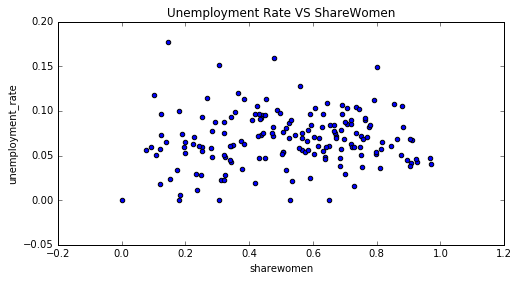

In [9]:
women_unempl_ax = recent_grads.plot(x='sharewomen', y='unemployment_rate', kind='scatter', figsize=(8, 4),
                                     title='Unemployment Rate VS ShareWomen')

> Доля женщин среди учащийся на по той или иной специальности не влияет на уровень безработицы выпускников

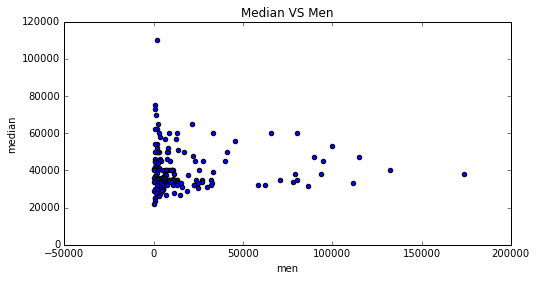

In [10]:
men_median_ax = recent_grads.plot(x='men', y='median', kind='scatter', figsize=(8, 4),
                                     title='Median VS Men')

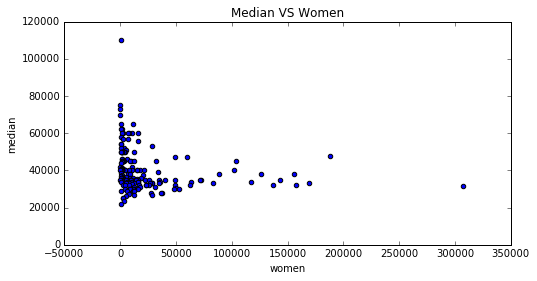

In [11]:
women_median_ax = recent_grads.plot(x='women', y='median', kind='scatter', figsize=(8, 4),
                                     title='Median VS Women')

> И мужчины и женщины с разных специальностей имеют примерно равную среднюю зп


### Исследуем распределение

Чтобы нагляднее представить распределение значений построим гистограммы для следующих столбцов: 

* sample_size ыава
* median 
* employed
* full_time
* shareWomen
* unemployment_rate
* men
* women

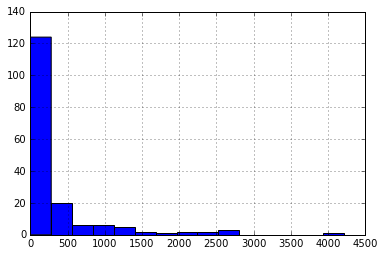

In [12]:
sample_hist = recent_grads['sample_size'].hist(bins=15, range=(0, recent_grads['sample_size'].max()))

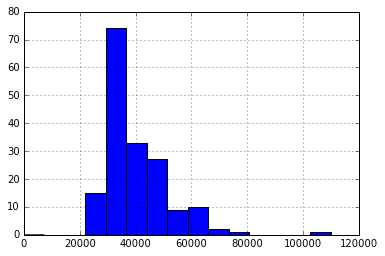

In [13]:
median_hist = recent_grads['median'].hist(bins=15, range=(0, recent_grads['median'].max()))

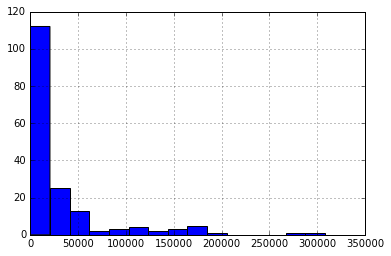

In [14]:
employed_hist = recent_grads['employed'].hist(bins=15, range=(0, recent_grads['employed'].max()))

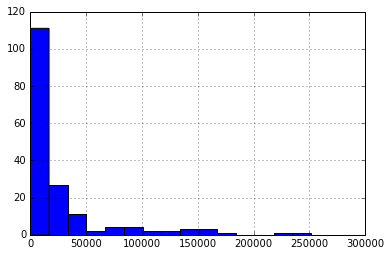

In [15]:
full_hist = recent_grads['full_time'].hist(bins=15, range=(0, recent_grads['full_time'].max()))

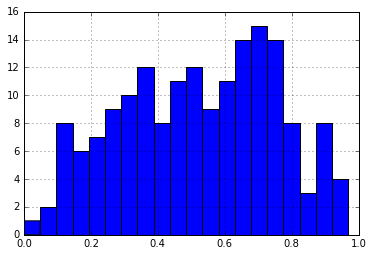

In [16]:
sharewomen_hist = recent_grads['sharewomen'].hist(bins=20, range=(0, recent_grads['sharewomen'].max()))

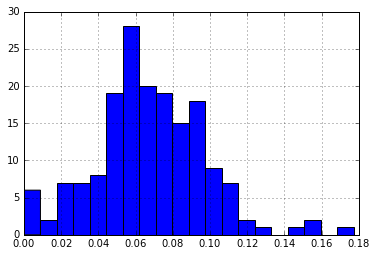

In [17]:
unempl_hist = recent_grads['unemployment_rate'].hist(bins=20, range=(0, recent_grads['unemployment_rate'].max()))

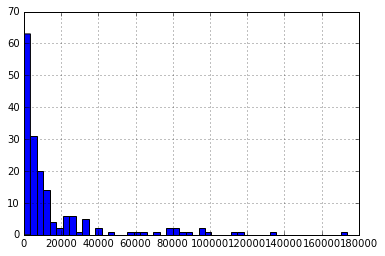

In [18]:
men_hist = recent_grads['men'].hist(bins=50, range=(0, recent_grads['men'].max()))

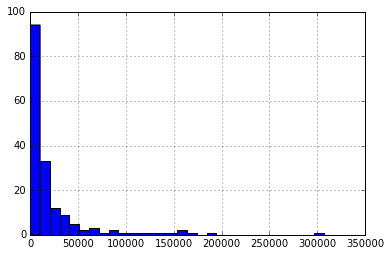

In [19]:
women_hist = recent_grads['women'].hist(bins=30, range=(0, recent_grads['women'].max()))

### Матрицы графиков

Оценивать разрозненные графики довольно проблематично. Для упрощения нашей задачи давайте посторим так называемые матрицы графиков.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3807a70240>,
      dtype=object)

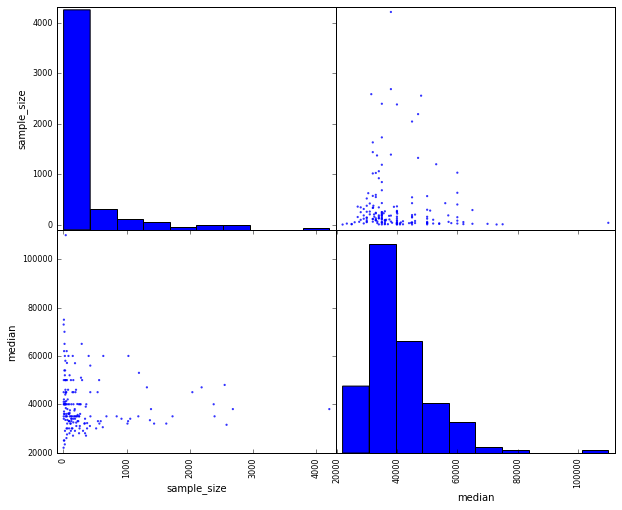

In [20]:
pd.plotting.scatter_matrix(recent_grads[['sample_size', 'median']], figsize=(10,8),
                           alpha=0.8, grid=True)

А можно добавить и третью величину.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3807921908>,
      dtype=object)

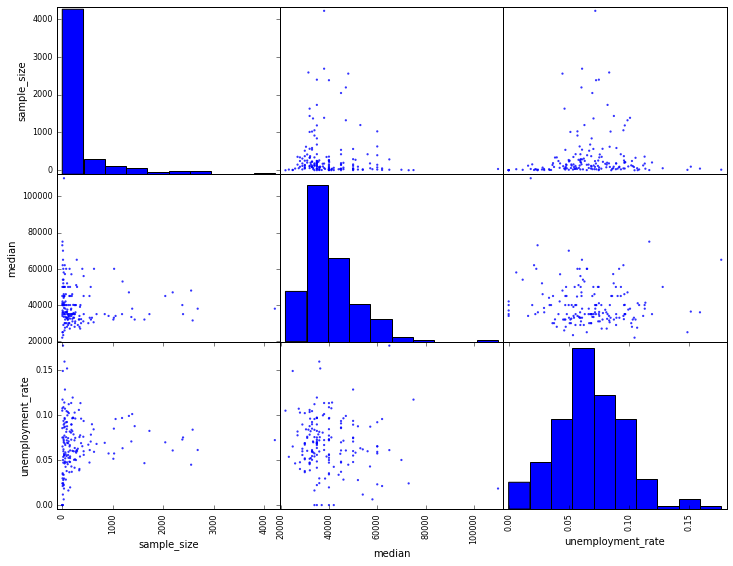

In [21]:
pd.plotting.scatter_matrix(recent_grads[['sample_size', 'median', 'unemployment_rate']],
                           figsize=(12,9), alpha=0.8, grid=True)

Давайте вспомним вопросы, на которые мы пытаемся ответить:

* Зарабатывают ли больше денег студенты с популярных специальностей?
* Зарабатывают ли больше денег студенты со специальностей, большинство на которых женщины?
* Есть ли связь между количеством трудоустроенных на постоянную работу студентов и средней зп?

Для это построим соответствующую матрицу графиков для величин:

* `total`(вместо `sample_size`)
* `sharewomen`
* `median`
* `full_time`

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3807582588>,
      dtype=object)

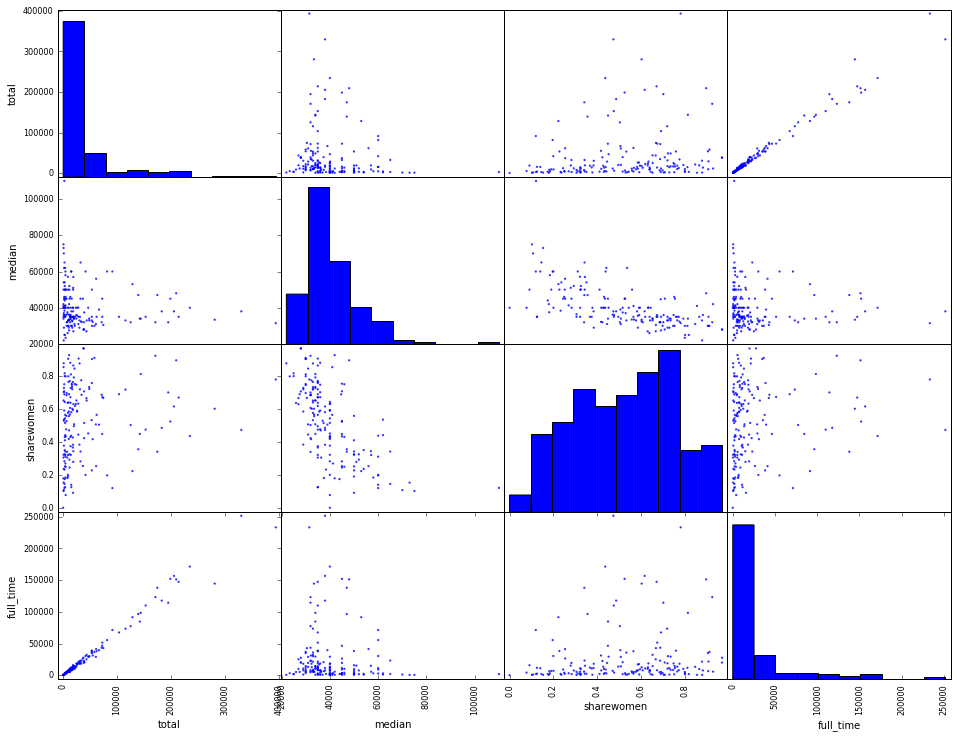

In [22]:
pd.plotting.scatter_matrix(recent_grads[['total', 'median', 'sharewomen', 'full_time']],
                           figsize=(16,12), alpha=0.8, grid=True)

### Наблюдения


*Зарабатывают ли больше денег студенты с популярных специальностей?*

Для начала давайте ещё раз посмотрим на среднее значении среднегодовй зарплаты.

In [23]:
recent_grads['median'].mean()

40076.74418604651

Давайте считать популярными специальности, имеющие более **100 тыс.** студентов. Судя по графику, примерный разброс их зарплат: от **30 тыс.** до **60 тыс.** При этом большинство точек всё-таки ниже отметки в **40 тыс.** - среднего значения.

Полный разброс зарплат: от **22 тыс.** до **110 тыс.**

Таким образом нельзя сказать, что более популярные специальности дают выпускникам большие зарплаты. Но в то же время они стабильно выше минимальных значений (**22 тыс.**), поэтому какой-то смысл поступать именно на них имеется.


Зарабатывают ли больше денег студенты со специальностей, большинство на которых женщины?
Есть ли связь между количеством трудоустроенных на постоянную работу студентов и средней зп?
___

*Зарабатывают ли больше денег студенты со специальностей, большинство на которых женщины?*

По графику хорошо видно снижение средней зарплаты с увеличением доли женщин среди студентов. Снижение происходи примерно с **50 тыс.** до **30 тыс.**
___

*Есть ли связь между количеством трудоустроенных на постоянную работу студентов и средней зп?*

Картина очень схожа с зависимость средней зарплаты от популярности специальности. Скорее всего большее количество студентов и обеспечивает большее количество трудоустроенных на более 35 часов в неделю.

Соотвественно большее количество трудоустроенных на более 35 часов в неделю просто обеспечивает меньший разброс зарплаты, а менно **30 тыс.** до **60 тыс.**
___

Построим пару диаграмм, чтобы сранить записи с начала и конца таблицы. Будем смотреть на долю женщин и рейтинг безработицы.

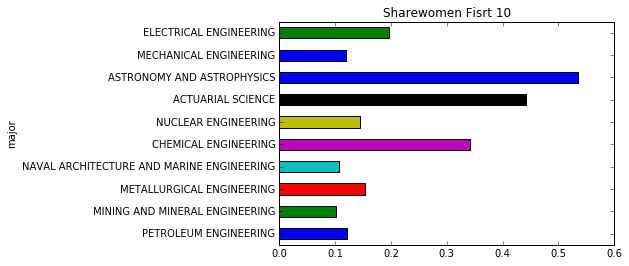

In [24]:
first_ten = recent_grads[:10]
last_ten = recent_grads[-10:]

first_ten.plot.barh(x='major', y='sharewomen', title='Sharewomen Fisrt 10', legend=False)

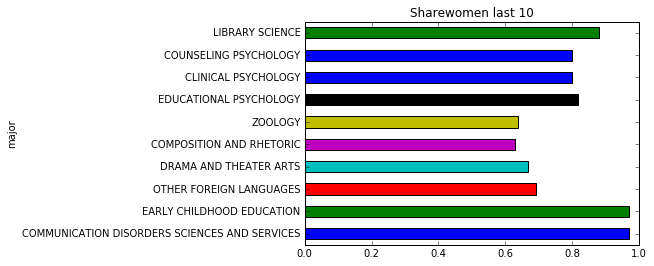

In [25]:
last_ten.plot.barh(x='major', y='sharewomen', title='Sharewomen last 10', legend=False)

Доля женщин заметно выше в последних 10 записях за исключением специальностей 'Astronomy and Astrophysics' и 'Actuarial Science'. Это также подтверждает теорию о более низких зарплатах на специальностей с большей долей женщин.

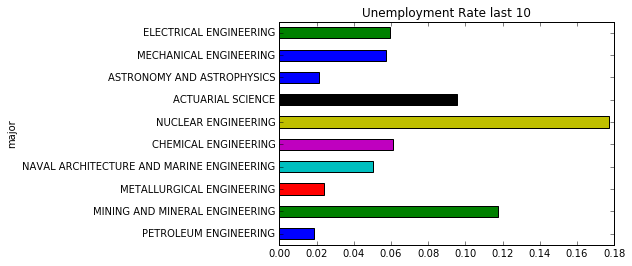

In [26]:
first_ten.plot.barh(x='major', y='unemployment_rate', title='Unemployment Rate last 10', legend=False) 

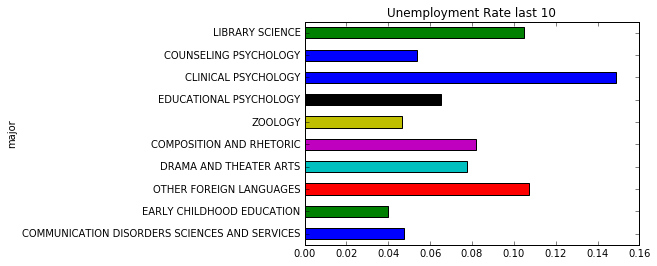

In [27]:
last_ten.plot.barh(x='major', y='unemployment_rate', title='Unemployment Rate last 10', legend=False)

Рейтинг безработицы в среднем чуть больше в последних 10 записях.

### Дополнительные исследования

Давайте посмотрим распределение мужчин и женчин по специальностям. 

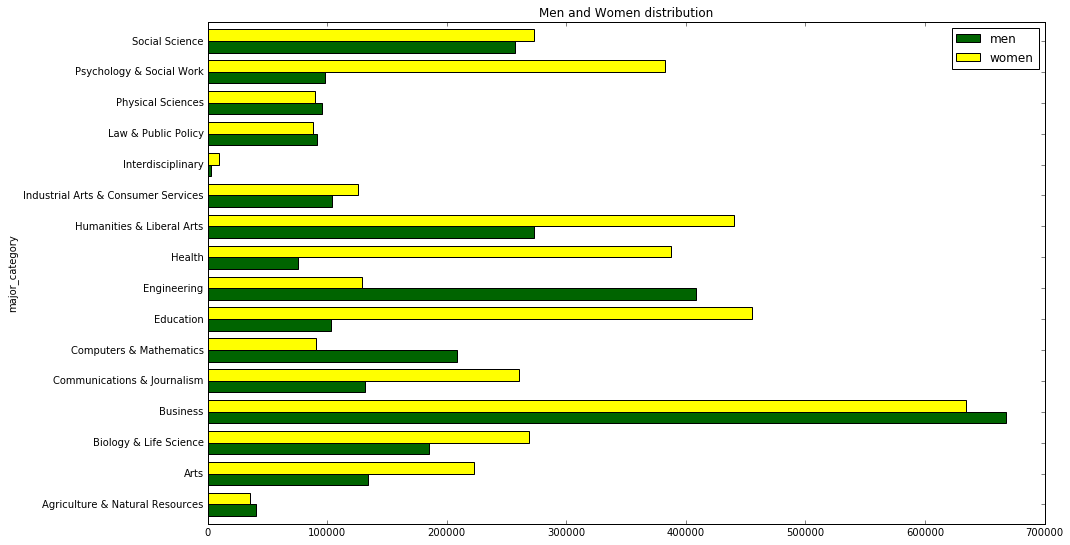

In [28]:
for_group_plot = recent_grads[['major_category', 'men', 'women']].groupby('major_category').sum()

for_group_plot.plot.barh(title='Men and Women distribution',
                         figsize=(15, 9),
                         color=['darkgreen', 'yellow'],
                         width=0.75)

В общем и целом количество мужчин и женщин примерно одинаковое на каждой специальности. Но есть несколько явно выделяющихся специальностей:

* На специальностях **'Health'**, **'Education'** и **'Psychology and Social Work'** женщин в разы больше
* На специальностях **'Engineering'** и **'Computers and Mathematics'** в разы больше мужчин

Также построим гексогональные диаграммы для трудночитаемых Диаграмм рассеяния.

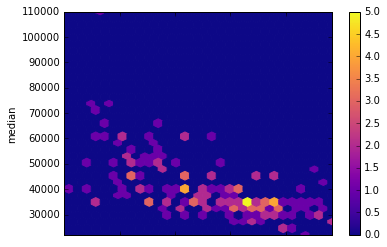

In [29]:
recent_grads.plot.hexbin(x='sharewomen',
                         y='median',
                         gridsize=30,
                         cmap='plasma')

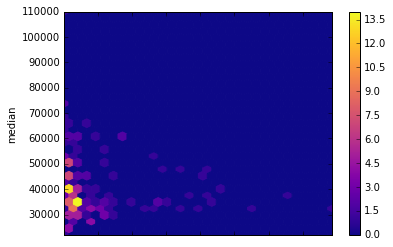

In [30]:
recent_grads.plot.hexbin(x='total',
                         y='median',
                         gridsize=30,
                         cmap='plasma')

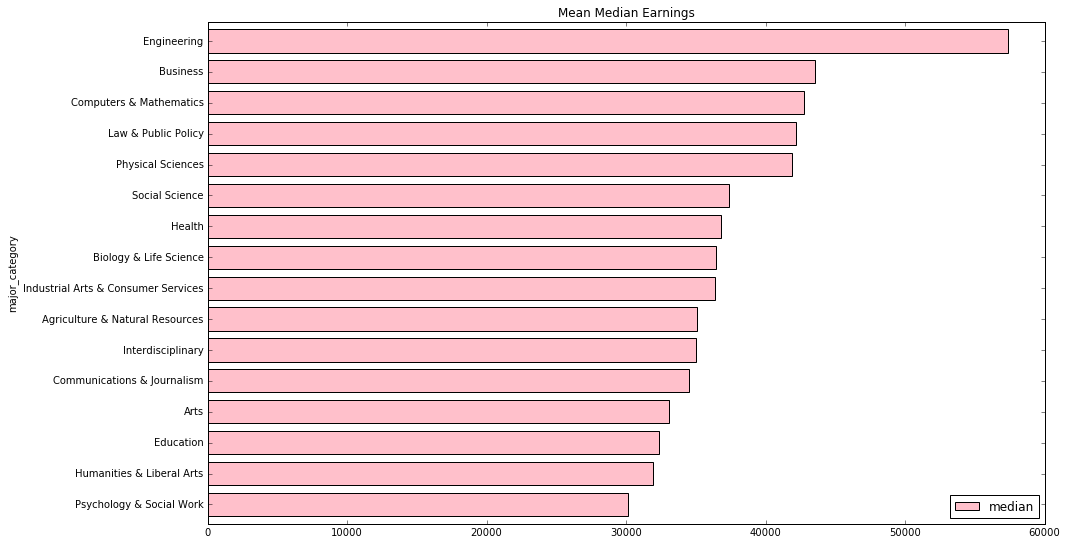

In [42]:
merid_group_plot = recent_grads[['major_category', 'median']].groupby(
                                'major_category').mean().sort_values('median')

merid_group_plot.plot.barh(title='Mean Median Earnings',
                         figsize=(15, 9),
                         color=['pink'],
                         width=0.75)